In [11]:
import polars as pl
import numpy as np

- Show number of rows and columns
- Show first records from csv

In [38]:
data = pl.read_csv('charcters_stats.csv')
marvel_data = pl.read_csv('charcters_stats_marvel.csv')

test = pl.DataFrame()

In [43]:
data = data.with_columns(pl.Series('Publisher', np.full(len(data), np.nan)))

joined_df = data.join(marvel_data, on=['Name','Alignment','Intelligence','Strength','Speed','Durability','Power','Combat','Total'])
joined_df

Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher,Alignment_right,Intelligence_right,Strength_right,Speed_right,Durability_right,Power_right,Combat_right,Total_right
str,str,i64,i64,i64,i64,i64,i64,i64,f64,str,i64,i64,i64,i64,i64,i64,i64
"""3-D Man""","""good""",50,31,43,32,25,52,233,NaN,"""good""",50,31,43,32,25,52,233
"""A-Bomb""","""good""",38,100,17,80,17,64,316,NaN,"""good""",38,100,17,80,17,64,316
"""Abe Sapien""","""good""",88,14,35,42,35,85,299,NaN,"""good""",88,14,35,42,35,85,299
"""Abin Sur""","""good""",50,90,53,64,84,65,406,NaN,"""good""",50,90,53,64,84,65,406
"""Abomination""","""bad""",63,80,53,90,55,95,436,NaN,"""bad""",63,80,53,90,55,95,436
"""Abraxas""","""bad""",88,100,83,99,100,56,526,NaN,"""bad""",88,100,83,99,100,56,526
"""Adam Monroe""","""good""",63,10,12,100,71,64,320,NaN,"""good""",63,10,12,100,71,64,320
"""Adam Strange""","""good""",1,1,1,1,0,1,5,NaN,"""good""",1,1,1,1,0,1,5
"""Agent 13""","""good""",1,1,1,1,0,1,5,NaN,"""good""",1,1,1,1,0,1,5


You need to find the values of alignment ,can use value_counts()

In [5]:
data.value_counts('Alignment')

Alignment
good       293
bad        122
neutral     11
dtype: int64

Find out only good alignment holders superheroes

In [6]:
good_heroes = data.loc[data['Alignment'] == 'good']
print(len(good_heroes))
good_heroes

293


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388


7. Show first five records which you found in point 6

In [7]:
good_heroes.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


8. Show top five records having top speed of heroes of good alignment

In [8]:
good_speed = good_heroes.sort_values('Speed', ascending=False)
good_speed.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
525,Stardust,good,88,85,100,110,100,85,568
537,Superman,good,100,100,100,100,94,85,579
229,Flash I,good,63,10,100,50,57,32,312
230,Flash II,good,63,10,100,60,66,32,331
231,Flash III,good,63,10,100,60,83,32,348


9. Show 5 records of super heroes who have maximum power of good alignment

In [9]:
good_power = good_heroes.sort_values('Power', ascending=False)
good_power.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
609,Zatanna,good,75,10,23,28,100,56,292
69,Beta Ray Bill,good,63,80,35,95,100,84,457
85,Black Bolt,good,75,67,100,84,100,56,482
589,Watcher,good,100,80,67,89,100,56,492
583,War Machine,good,63,80,63,100,100,85,491


10. Find out how many super heroes are there with power 100 of good alignment
11. Shape them what you got in point 10
12. Show all records from point 10

In [10]:
good_power_100 = good_heroes.loc[good_heroes['Power'] == 100]
print(good_power_100.shape)
print(f'There are {len(good_power_100)} heroes with power 100')
good_power_100

(31, 9)
There are 31 heroes with power 100


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
266,Hal Jordan,good,63,90,53,64,100,56,426


13. Retrieve total of first five records of max power of good alignment super heroes

In [11]:
good_power_100_5 = good_power_100.head(5)[['Name', 'Total']]
good_power_100_5

,Name,Total
69,Beta Ray Bill,457
70,Beyonder,467
85,Black Bolt,482
129,Cable,395
185,Deadman,335


14. Draw a bar plot of all super heroes who are having good alignment and max power of
top five only , take same object of point 13 , show name and total in plot with green
bars


[Text(0, 0, '482'),
 Text(0, 0, '467'),
 Text(0, 0, '457'),
 Text(0, 0, '395'),
 Text(0, 0, '335')]

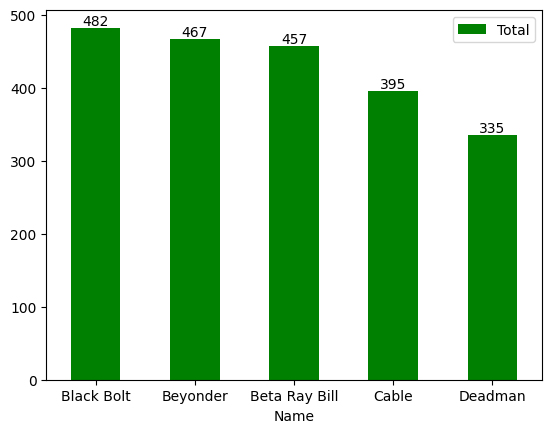

In [12]:
good_power_100_5 = good_power_100_5.sort_values('Total', ascending=False)

ax = good_power_100_5.plot(kind='bar', x='Name', rot=0, color='Green')
ax.bar_label(ax.containers[0])

15. Extract villains having bad alignment

In [13]:
bad_vil = data.loc[data['Alignment'] == 'bad']
bad_vil

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
23,Annihilus,bad,75,80,47,56,59,64,381
...,...,...,...,...,...,...,...,...,...
581,Vulture,bad,63,22,47,56,40,56,284
582,Walrus,bad,50,28,8,50,11,20,167
586,Warp,bad,38,10,23,28,63,50,212
593,Willis Stryker,bad,38,16,23,28,41,60,206


16. Show first five records of point 15

In [14]:
bad_vil.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
23,Annihilus,bad,75,80,47,56,59,64,381


17. Show top five fastest super villains in terms of super speed

In [15]:
bad_speed = bad_vil.sort_values('Speed', ascending=False)
bad_speed.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
610,Zoom,bad,50,10,100,28,72,28,288
535,Superboy-Prime,bad,94,100,100,100,100,85,579
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
242,General Zod,bad,94,100,96,100,94,95,579


18. Top five super villains in terms of intelligence

In [16]:
bad_vil.sort_values('Intelligence', ascending=False).head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
338,Lex Luthor,bad,100,10,12,14,10,28,174
555,Tinkerer,bad,100,10,23,14,10,14,171
315,Joker,bad,100,10,12,56,22,90,290
321,Kang,bad,100,48,58,70,71,70,417


19. Show who is most dangerous super villain after calculating their total (top 5 only)

In [17]:
worst_vil = bad_vil.sort_values('Total', ascending=False)
worst_vil.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


20. Draw a histogram for speed of super heroes having fig size 10,5 , provide speed in
histogram for only good alignment super heroes ,title should be "distribution of
speed" , xlabel should be "speed"


Text(0.5, 0, 'Speed')

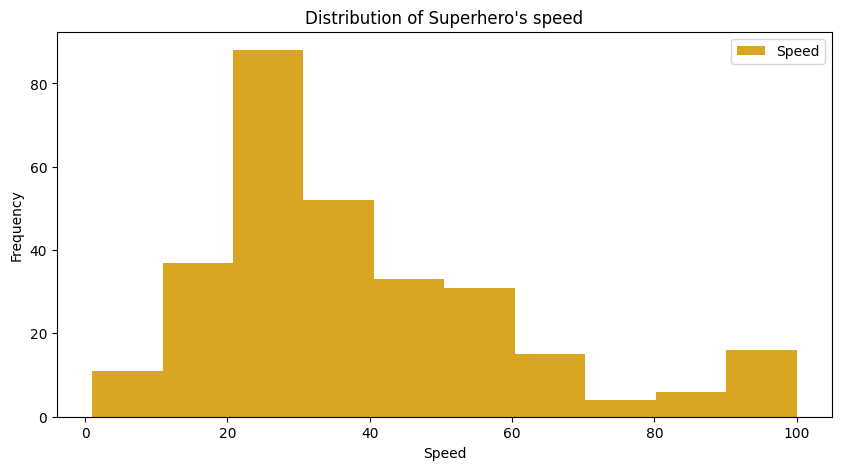

In [18]:
ax = good_speed[['Speed']].plot(kind='hist', title='Distribution of Superhero\'s speed', color='Goldenrod', figsize=(10, 5))
ax.set_xlabel('Speed')

Text(0.5, 0, 'Combat')

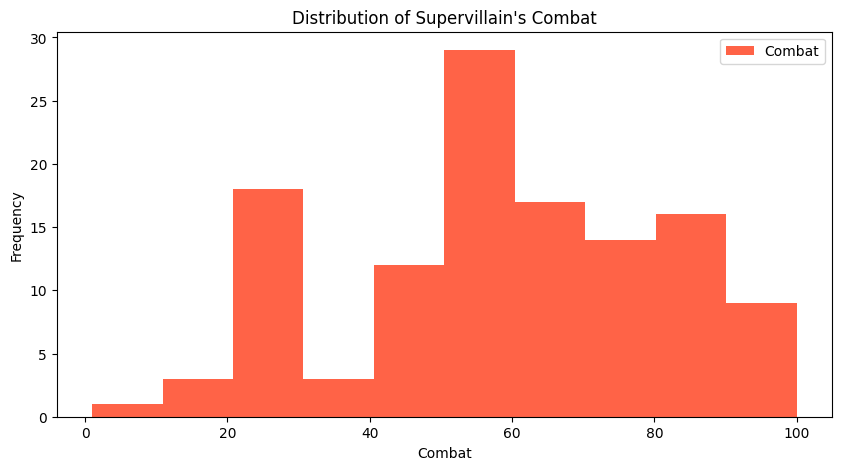

In [19]:
bad_combat = bad_vil.sort_values('Combat', ascending=False)
ax = bad_combat[['Combat']].plot(kind='hist', title='Distribution of Supervillain\'s Combat', color='Tomato', figsize=(10, 5))
ax.set_xlabel('Combat')

Extensions

In [20]:
good_bad = data.loc[(data['Alignment'] == 'good') | (data['Alignment'] == 'bad')]
good_bad

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [21]:
count_good = len(good_bad.loc[good_bad['Alignment'] == 'good'])
count_bad = len(good_bad.loc[good_bad['Alignment'] == 'bad'])
count_neutral = len(data.loc[data['Alignment'] == 'neutral'])


print(f'There are {count_good} good guys')
print(f'There are {count_bad} bad guys')
print(f'There are {count_neutral} people who neither good or bad')
print(f'On average, there are {round(count_good / count_bad, 2)} times more superheroes than villians')

There are 293 good guys
There are 122 bad guys
There are 11 people who neither good or bad
On average, there are 2.4 times more superheroes than villians


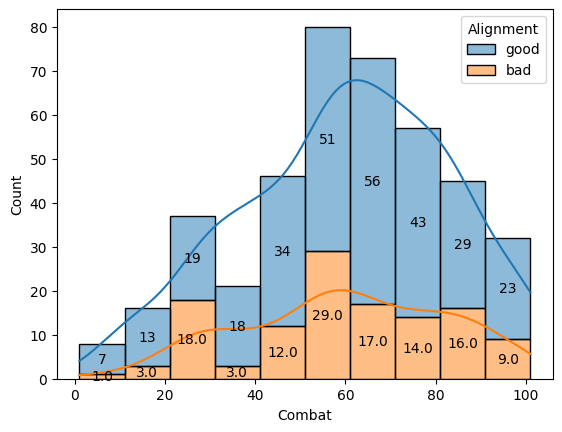

In [22]:
ax = sns.histplot(data=good_bad, x='Combat', hue='Alignment', multiple='stack', kde=True, stat='count')
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

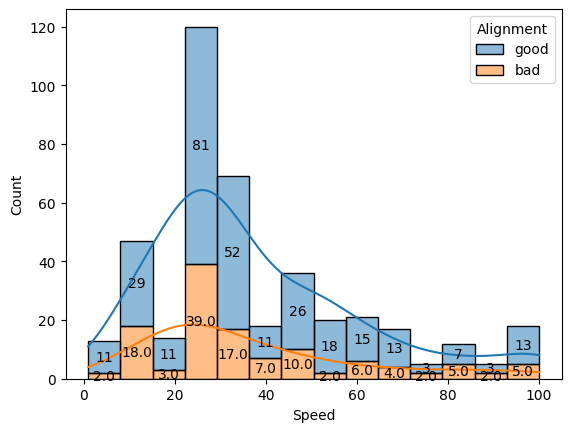

In [23]:
ax = sns.histplot(data=good_bad, x='Speed', hue='Alignment', multiple='stack', kde=True)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

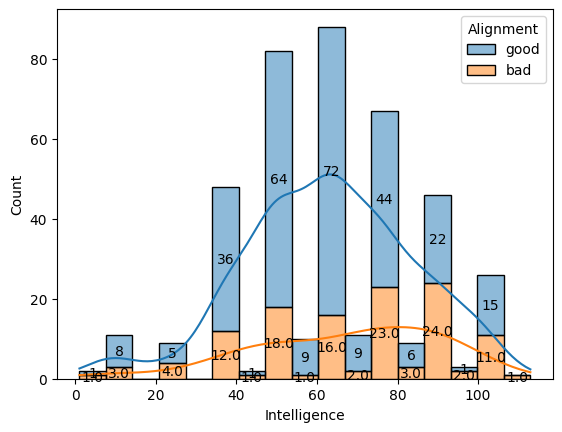

In [24]:
ax = sns.histplot(data=good_bad, x='Intelligence', hue='Alignment', multiple='stack', kde=True)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

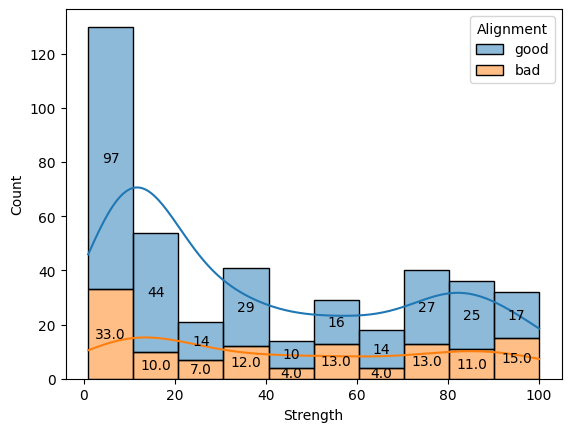

In [25]:
ax = sns.histplot(data=good_bad, x='Strength', hue='Alignment', multiple='stack', kde=True)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

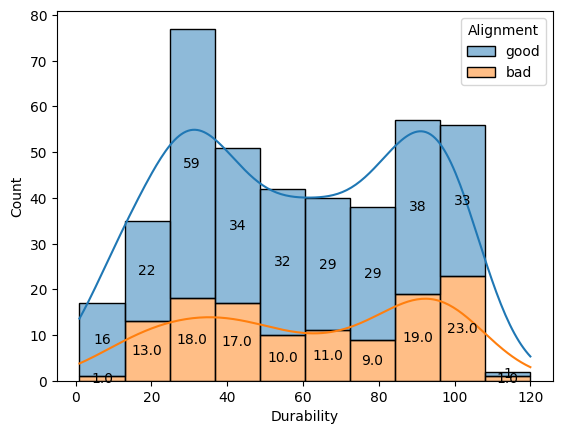

In [26]:
ax = sns.histplot(data=good_bad, x='Durability', hue='Alignment', multiple='stack', kde=True)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

In [30]:
data.sort_values('Speed', ascending=False).head(30)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
610,Zoom,bad,50,10,100,28,72,28,288
295,Impulse,good,50,10,100,60,63,60,343
304,Jack of Hearts,good,63,55,100,30,70,30,348
537,Superman,good,100,100,100,100,94,85,579
418,Nova,good,38,60,100,100,100,25,423
535,Superboy-Prime,bad,94,100,100,100,100,85,579
525,Stardust,good,88,85,100,110,100,85,568
333,Krypto,good,9,80,100,90,72,40,391
82,Bizarro,neutral,75,95,100,100,95,85,550
16,Amazo,bad,75,100,100,100,100,100,575
